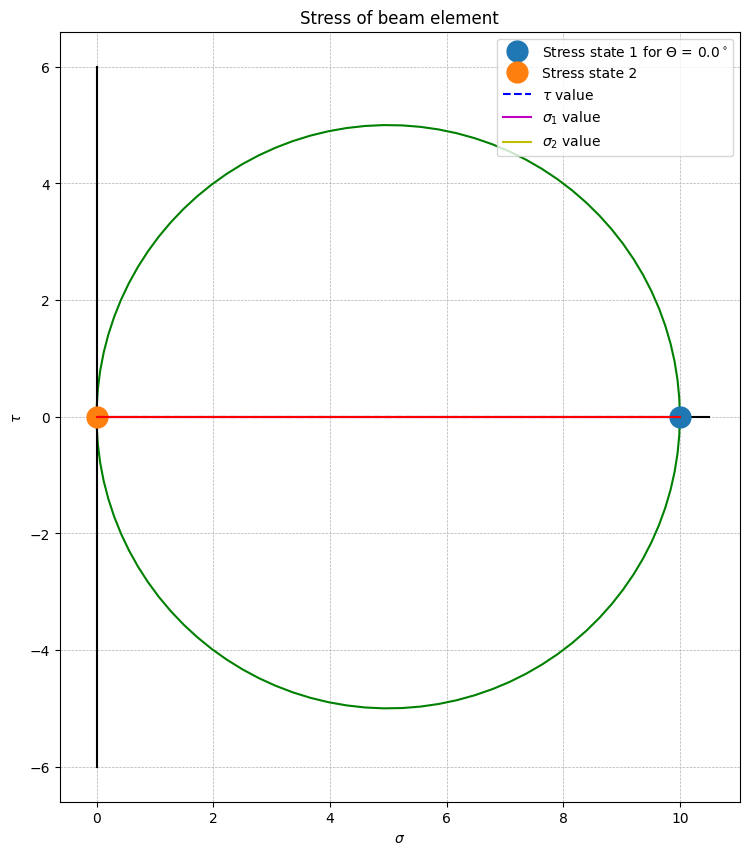

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


sigma_x = 0  # Replace with the actual value
tau = 0
sigma_y = 10

# Center and radius of Mohr's Circle
center = (sigma_x + sigma_y) / 2
radius = np.sqrt(((sigma_x - sigma_y) / 2) ** 2 + tau ** 2)

# Generate points for Mohr's Circle
theta = np.linspace(0, 2 * np.pi, 100)
x = center + radius * np.cos(theta)
y = radius * np.sin(theta)

x_0=np.zeros_like(x)
x_1=np.linspace(-radius*1.2,radius*1.2,100)
x_2=np.linspace(-0.1,radius*2.1,100)


plt.figure(figsize=(10,10))
plt.plot(x, y,'g')
plt.plot(x_0,x_1,'k-')
plt.plot(x_2,x_0,'k-')


theta_1=0
line_x = radius * np.cos(theta_1)
line_y = radius * np.sin(theta_1)

plt.plot(radius + line_x, line_y, 'o',markersize=15, label=f'Stress state 1 for $\Theta$ = {round(np.degrees(theta_1/2), 1)}$^\circ$')

plt.plot(radius-line_x,-line_y,'o',markersize=15,label='Stress state 2')


plt.plot([0, radius+line_x], [line_y, line_y],'b--',label=r'$\tau$ value')
plt.plot([radius+line_x, radius+line_x], [0, line_y],'m-',label=r'$\sigma_1$ value')

plt.plot([0, radius-line_x], [-line_y, -line_y],'b--')
plt.plot([radius-line_x, radius-line_x], [0, -line_y],'y-',label=r'$\sigma_2$ value')


plt.plot([radius, radius+line_x], [0, line_y], 'r-')  # Plot the line
plt.plot([radius, radius-line_x], [0, -line_y], 'r-')  # Plot the line

plt.title('Stress of beam element')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\tau$')
plt.legend()

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Angle Arc
angle_arc = patches.Arc((radius, 0), 0.2, 0.2, angle=0, theta1=0, theta2=theta_1*180/np.pi, edgecolor='green', lw=2)
ax.add_patch(angle_arc)

plt.show()

The principal stresses, $\sigma_1$ and $\sigma_2$, are given by:

$$
\sigma_1, \sigma_2 = \frac{\sigma_x + \sigma_y}{2} \pm \sqrt{\left( \frac{\sigma_x - \sigma_y}{2} \right)^2 + \tau_{xy}^2}
$$

$$
\tau_{\text{max}} = \sqrt{\left( \frac{\sigma_x - \sigma_y}{2} \right)^2 + \tau_{xy}^2}
$$

$$
\sigma_{x'} = \frac{\sigma_x + \sigma_y}{2} + \frac{\sigma_x - \sigma_y}{2}\cos(2\theta) + \tau_{xy}\sin(2\theta)
$$


$$
\sigma_{y'} = \frac{\sigma_x + \sigma_y}{2} - \frac{\sigma_x - \sigma_y}{2}\cos(2\theta) - \tau_{xy}\sin(2\theta)
$$

$$
\tau_{x'y'} = -\frac{\sigma_x - \sigma_y}{2}\sin(2\theta) + \tau_{xy}\cos(2\theta)
$$

$$
\sigma_{\text{v}} = \sqrt{\sigma_x^2 - \sigma_x \sigma_y + \sigma_y^2 + 3\tau_{xy}^2}
$$


$$
\sigma_x = \frac{M \cdot y}{I}
$$
$$
\sigma_y = \frac{F}{A}
$$

$$
\tau = \frac{V \cdot Q}{I \cdot b}
$$

$$
\sigma_x = \frac{F}{A}
$$

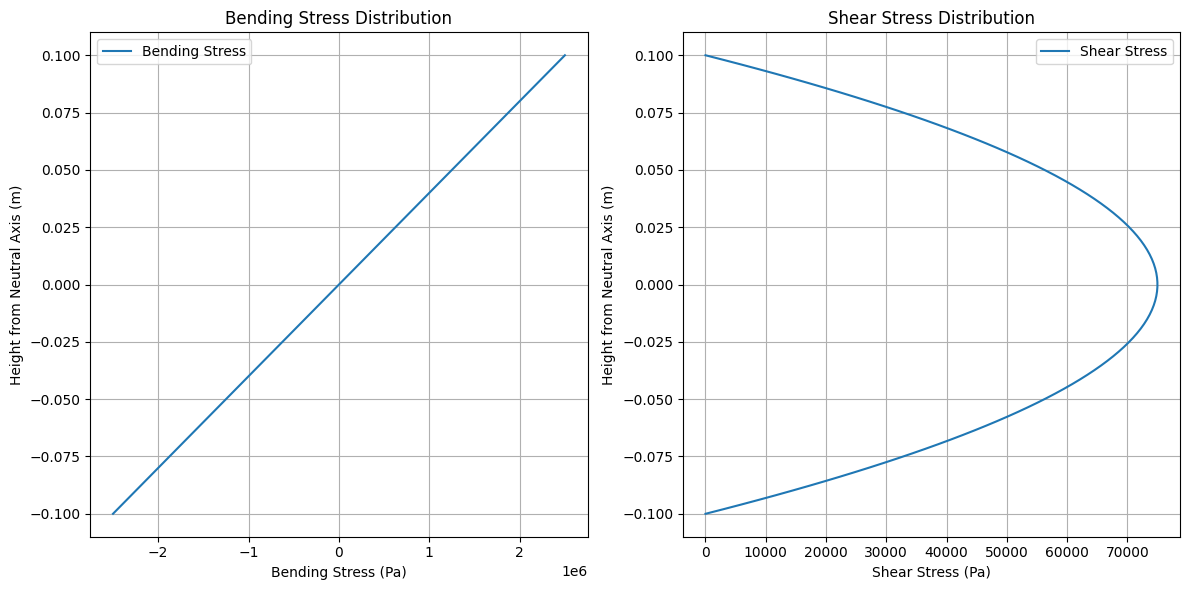

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Beam and load parameters
L = 10.0  # length of the beam in meters
P = 1000.0  # point load in Newtons
I = 1e-4  # moment of inertia in m^4
A = 0.01  # cross-sectional area in m^2
h = 0.2  # height of the beam in meters

# Calculating the maximum bending moment (at the center of the beam)
M_max = P * L / 4

# Calculating the maximum shear force (at the supports)
V_max = P / 2

# Heights from the neutral axis (from -h/2 to h/2)
y_values = np.linspace(-h/2, h/2, 100)

# Bending stress calculation (sigma = M*y/I)
bending_stress = M_max * y_values / I

# Shear stress calculation for a rectangular cross-section
# tau = 1.5 * V/A * (1 - (4y^2/h^2))
shear_stress = 1.5 * V_max / A * (1 - (4 * y_values**2 / h**2))

# Plotting
plt.figure(figsize=(12, 6))

# Bending stress plot
plt.subplot(1, 2, 1)
plt.plot(bending_stress, y_values, label='Bending Stress')
plt.xlabel('Bending Stress (Pa)')
plt.ylabel('Height from Neutral Axis (m)')
plt.title('Bending Stress Distribution')
plt.grid(True)
plt.legend()

# Shear stress plot
plt.subplot(1, 2, 2)
plt.plot(shear_stress, y_values, label='Shear Stress')
plt.xlabel('Shear Stress (Pa)')
plt.ylabel('Height from Neutral Axis (m)')
plt.title('Shear Stress Distribution')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
combined_stress = np.sqrt(bending_stress**2 + 3 * shear_stress**2)


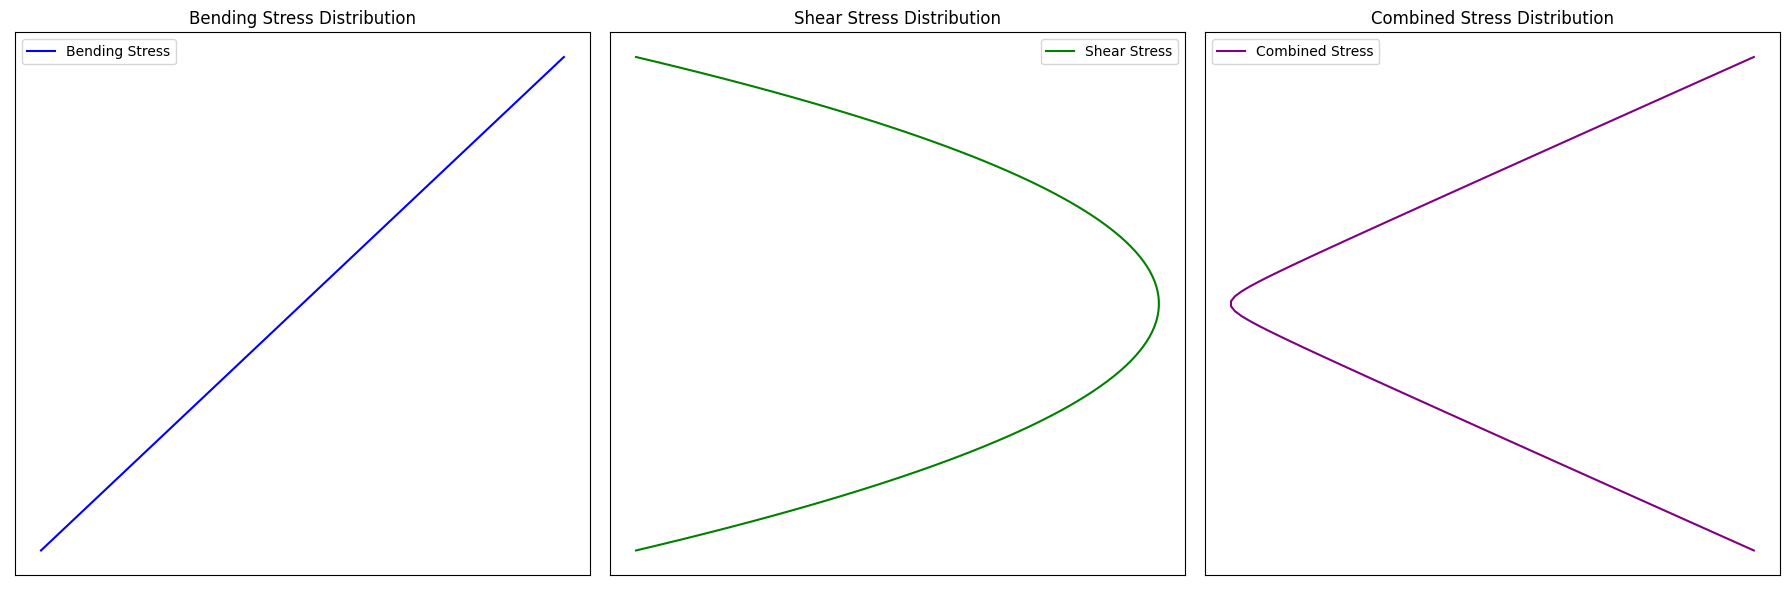

In [4]:
# Plotting without grid and axis values

plt.figure(figsize=(18, 6))

# Bending stress plot
plt.subplot(1, 3, 1)
plt.plot(bending_stress, y_values, label='Bending Stress', color='blue')
plt.title('Bending Stress Distribution')
plt.legend()
plt.xticks([])
plt.yticks([])

# Shear stress plot
plt.subplot(1, 3, 2)
plt.plot(shear_stress, y_values, label='Shear Stress', color='green')
plt.title('Shear Stress Distribution')
plt.legend()
plt.xticks([])
plt.yticks([])

# Combined stress plot
plt.subplot(1, 3, 3)
plt.plot(combined_stress, y_values, label='Combined Stress', color='purple')
plt.title('Combined Stress Distribution')
plt.legend()
plt.xticks([])
plt.yticks([])

# Show the plots
plt.tight_layout()
plt.show()


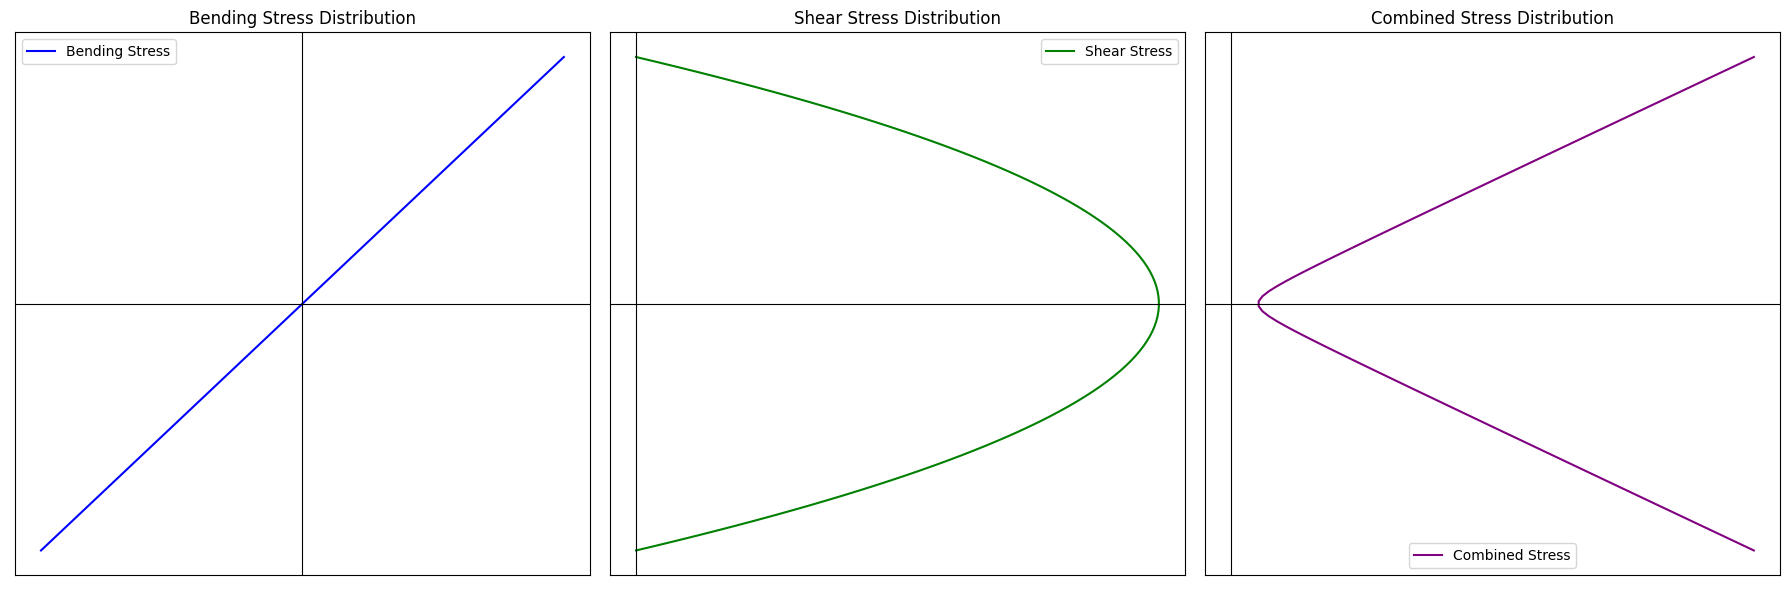

In [6]:
# Plotting with only the x=0 and y=0 axis lines

plt.figure(figsize=(18, 6))

# Function to add x=0 and y=0 lines to the plot
def add_axis_lines(ax):
    # Adding x=0 line
    ax.axhline(0, color='black', linewidth=0.8)
    # Adding y=0 line
    ax.axvline(0, color='black', linewidth=0.8)

# Bending stress plot with only x=0 and y=0 lines
ax1 = plt.subplot(1, 3, 1)
plt.plot(bending_stress, y_values, label='Bending Stress', color='blue')
plt.title('Bending Stress Distribution')
plt.xticks([])
plt.yticks([])
plt.legend()
add_axis_lines(ax1)

# Shear stress plot with only x=0 and y=0 lines
ax2 = plt.subplot(1, 3, 2)
plt.plot(shear_stress, y_values, label='Shear Stress', color='green')
plt.title('Shear Stress Distribution')
plt.legend()
plt.xticks([])
plt.yticks([])
add_axis_lines(ax2)

# Combined stress plot with only x=0 and y=0 lines
ax3 = plt.subplot(1, 3, 3)
plt.plot(combined_stress, y_values, label='Combined Stress', color='purple')
plt.title('Combined Stress Distribution')
plt.legend()
plt.xticks([])
plt.yticks([])
add_axis_lines(ax3)

# Show the plots
plt.tight_layout()
plt.show()
